In [97]:
import wandb
import Framework.Confounder_Injection as CI
import Framework.Models as Models
import importlib
importlib.reload(Models)
importlib.reload(CI)
import os
import numpy as np
import seaborn as sns

In "Validation of synthetic data" the case were the training_data was completely confounded was tested to show that neural networks indeed fit to confounding factors in images. Now the hypothesis is that if we have a small set of unconfounded data we can either use a confounder-free neural network or a DANN to unlearn the confounders. For establishing a performance baseline we need to test the SimpleConv on a dataset consisting of the confounded set and the small unconfounded set, otherwise the conditions would not be equal for the different networks.

In this case there are 512 samples from the source domain (with correlating confounders) and a varying number of samples (16 or 64) from the target domain (with no confounders).

In [98]:
model = Models.BrNet()
batch_date = "Mon Aug 29 14:10:50 CEST 2022"
filters = {
    "config.batch_date": batch_date,
    "config.target_domain_samples": 0,
    "summary_metrics.confounder_strength": 0,
    "config.target_domain_confounding":0,
}
# importlib.reload(CI)
# CI.wandb_sync.get_best_runs(project="Hyperparameters", filters=filters, force_reload=False)

In [99]:
importlib.reload(CI)
table = CI.helper.BrNet_on_BrNet_data_all(batch_date=batch_date, force_reload=True)
table

Testing networks:
-- batch_date=Mon Aug 29 14:10:50 CEST 2022
-- test_confounding=0
-- target_domain_samples=0
-- target_domain_confounding=0
-- de_correlate_confounder_target=0
15 models found in database
Best runs synced (took 34.43174338340759s)
Models re-created (took 0.017852783203125s)
Runs synced, models re-created and tested (took 34.89721941947937s)

Testing networks:
-- batch_date=Mon Aug 29 14:10:50 CEST 2022
-- test_confounding=1
-- target_domain_samples=0
-- target_domain_confounding=0
-- de_correlate_confounder_target=0
15 models found in database
Best runs synced (took 34.73722839355469s)
Models re-created (took 0.024851560592651367s)
Runs synced, models re-created and tested (took 35.27222466468811s)

Testing networks:
-- batch_date=Mon Aug 29 14:10:50 CEST 2022
-- test_confounding=0
-- target_domain_samples=16
-- target_domain_confounding=0
-- de_correlate_confounder_target=0
15 models found in database
Best runs synced (took 34.0547571182251s)
Models re-created (took 

,model,classification_accuracy,confounder_accuracy,random,experiment,summary_metrics.confounder_strength,config.target_domain_samples,config.target_domain_confounding,config.de_correlate_confounder_target,config.batch_date
0,BrNet_CF_free_features_corr,0.500000,0.0,2922635856158377903,1,0,0,0,0,Mon Aug 29 14:10:50 CEST 2022
1,BrNet_DANN_corr,0.500000,0.0,8802176195322685755,1,0,0,0,0,Mon Aug 29 14:10:50 CEST 2022
2,BrNet_CF_free_labels_entropy,0.500000,0.0,5293483721908403583,1,0,0,0,0,Mon Aug 29 14:10:50 CEST 2022
3,BrNet_CF_free_features_corr_conditioned_0.0,0.500000,0.0,8564723708102719084,1,0,0,0,0,Mon Aug 29 14:10:50 CEST 2022
4,BrNet_CF_free_DANN_labels_entropy,0.500000,0.0,8480120934541887254,1,0,0,0,0,Mon Aug 29 14:10:50 CEST 2022
...,...,...,...,...,...,...,...,...,...,...
10,BrNet_CF_free_labels_corr_conditioned_0.0,0.498047,1.0,1505303099751489192,7,1,64,1,1,Mon Aug 29 14:10:50 CEST 2022
11,BrNet_CF_free_labels_entropy_conditioned_0.0,0.498047,1.0,3791863557928179764,7,1,64,1,1,Mon Aug 29 14:10:50 CEST 2022
12,BrNet_DANN_entropy_conditioned_0.0,0.498047,1.0,8995685617713075485,7,1,64,1,1,Mon Aug 29 14:10:50 CEST 2022
13,BrNet_CF_free_DANN_labels_entropy,0.498047,1.0,799186997384360280,7,1,64,1,1,Mon Aug 29 14:10:50 CEST 2022


<AxesSubplot:xlabel='experiment', ylabel='model'>

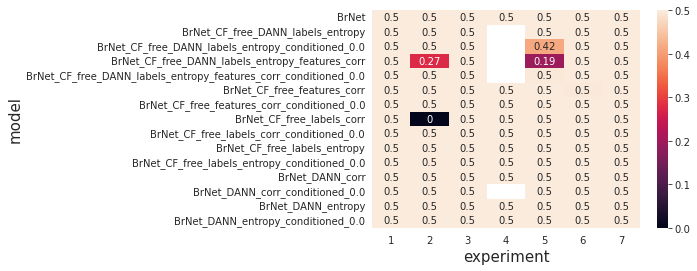

In [100]:
df = table.pivot_table(index="model", columns="experiment", values="classification_accuracy")
#df = table[table["config.de_correlate_confounder_target"] == 0]
# display(df)
sns.heatmap(data=df, annot=True)

# No confounders in target data

### With 0 training-samples from target population

<AxesSubplot:xlabel='summary_metrics.confounder_strength', ylabel='model'>

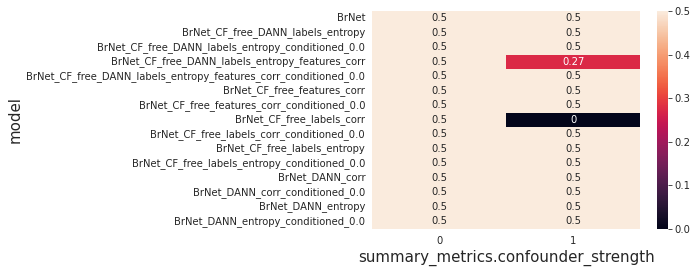

In [101]:
df1 = table[table["config.de_correlate_confounder_target"] == 0]
df1 = df1[df1["config.target_domain_samples"] == 0]
df1 = df1.pivot_table(index="model", columns="summary_metrics.confounder_strength", values="classification_accuracy")
sns.heatmap(data=df1, annot=True)

### With 16 training-samples from target population

The accuracy with more samples is the same but the network converges faster.

<AxesSubplot:xlabel='summary_metrics.confounder_strength', ylabel='model'>

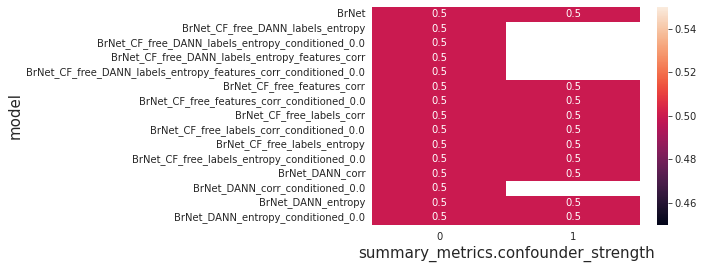

In [102]:
df1 = table[table["config.de_correlate_confounder_target"] == 0]
df1 = df1[df1["config.target_domain_samples"] == 16]
df1 = df1.pivot_table(index="model", columns="summary_metrics.confounder_strength", values="classification_accuracy")
sns.heatmap(data=df1, annot=True)

config_filter = {"confounder_strength":1, "target_domain_samples":16, "de_correlate_confounder_target": False, "batch_date": date, "target_domain_confounding":0}
p.accuracy_vs_epoch(file, config_filter, groupby="model")

# De-correlated confounders in target- and test-data

### With 0 training-samples from target population


<AxesSubplot:xlabel='summary_metrics.confounder_strength', ylabel='model'>

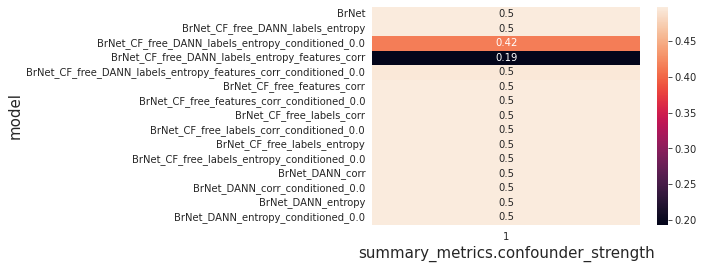

In [103]:
df1 = table[table["config.de_correlate_confounder_target"] == 1]
df1 = df1[df1["config.target_domain_samples"] == 0]
df1 = df1.pivot_table(index="model", columns="summary_metrics.confounder_strength", values="classification_accuracy")
sns.heatmap(data=df1, annot=True)

### With 16 training-samples from target population

In [104]:
df1 = table[table["config.de_correlate_confounder_target"] == 1]
df1 = df1[df1["config.target_domain_samples"] == 16]
df1 = df1.pivot_table(index="model", columns="summary_metrics.confounder_strength", values="classification_accuracy")
#df1.reindex(df1["value"].sort_values(by="summary_metrics.confounder_strength"))
print(df1)
df1 = df1.sort_values(("summary_metrics.confounder_strength","1"), ascending=True)
sns.heatmap(data=df1, annot=True)

summary_metrics.confounder_strength                        1
model                                                       
BrNet                                               0.498047
BrNet_CF_free_DANN_labels_entropy                   0.498047
BrNet_CF_free_DANN_labels_entropy_conditioned_0.0   0.498047
BrNet_CF_free_DANN_labels_entropy_features_corr     0.498047
BrNet_CF_free_DANN_labels_entropy_features_corr...  0.498047
BrNet_CF_free_features_corr                         0.495117
BrNet_CF_free_features_corr_conditioned_0.0         0.498047
BrNet_CF_free_labels_corr                           0.498047
BrNet_CF_free_labels_corr_conditioned_0.0           0.498047
BrNet_CF_free_labels_entropy                        0.498047
BrNet_CF_free_labels_entropy_conditioned_0.0        0.498047
BrNet_DANN_corr                                     0.498047
BrNet_DANN_corr_conditioned_0.0                     0.498047
BrNet_DANN_entropy                                  0.498047
BrNet_DANN_entropy_condi

KeyError: ('summary_metrics.confounder_strength', '1')

### With 128 training-samples from target population

In [ ]:
df1 = table[table["config.de_correlate_confounder_target"] == 1]
df1 = df1[df1["config.target_domain_samples"] == 64]
df1 = df1.pivot_table(index="model", columns="summary_metrics.confounder_strength", values="classification_accuracy")
sns.heatmap(data=df1, annot=True)